<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import statistics
from IPython.display import display, Markdown, Latex

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [2]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4

seedno=5

random.seed(seedno)

REG = nx.watts_strogatz_graph(n,d,0,seedno)
print(nx.is_connected(REG))

RGER =  nx.gnm_random_graph(n,M,seed=seedno,directed=False)
print(nx.is_connected(RGER))

R = 0.6
RGG = nx.random_geometric_graph(n,R,seedno)
# while not nx.is_connected(RGG):
#     seedno2 = random.randint(2,10000)
#     random.seed(seedno2)
#     RGG = nx.random_geometric_graph(n,0.5,seedno2)
print(nx.is_connected(RGG))

SF = nx.barabasi_albert_graph(n,d,seed=seedno)
print(nx.is_connected(SF))

SW = nx.watts_strogatz_graph(n,d,p) 
print(nx.is_connected(SW))

True
True
True
True
True


<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

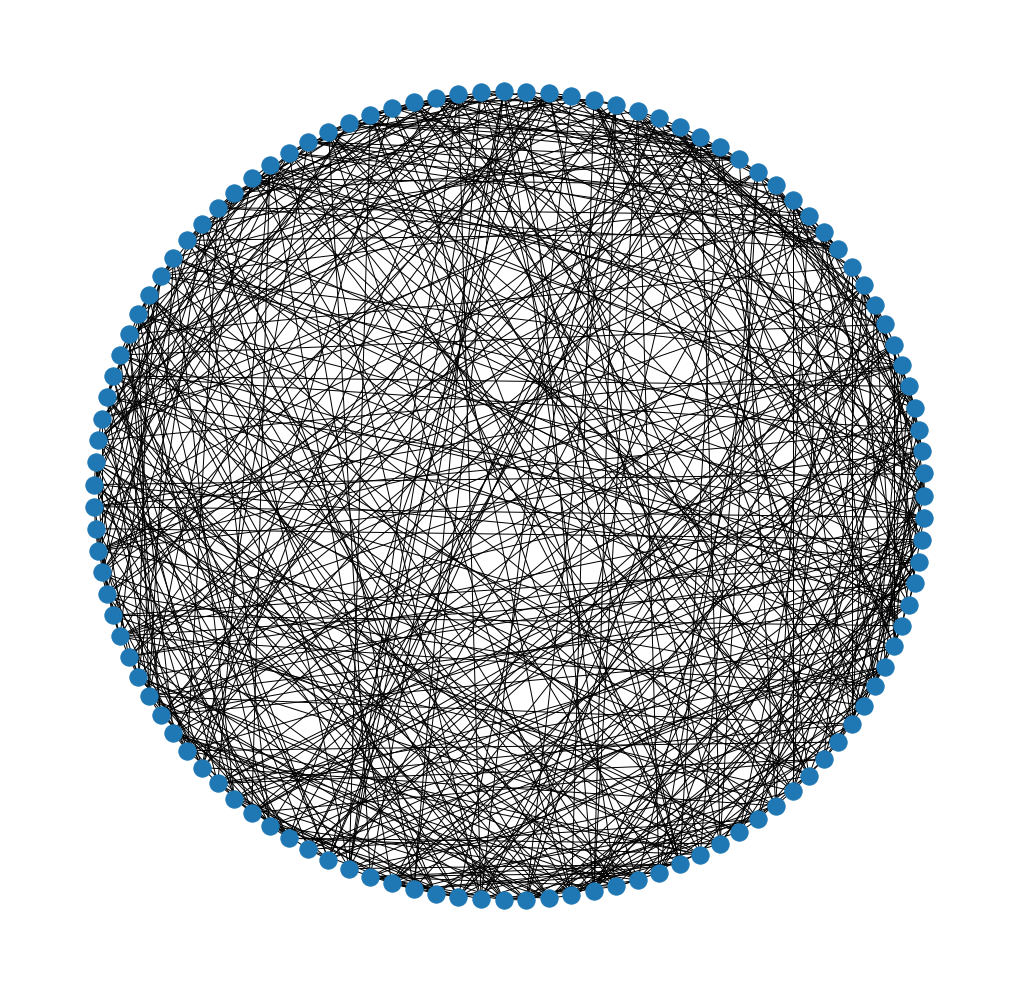

In [3]:
#football network
football=nx.read_gml(r"football.gml")
fig, ax = plt.subplots(figsize=(18,18))
nx.draw_circular(football,ax=ax)

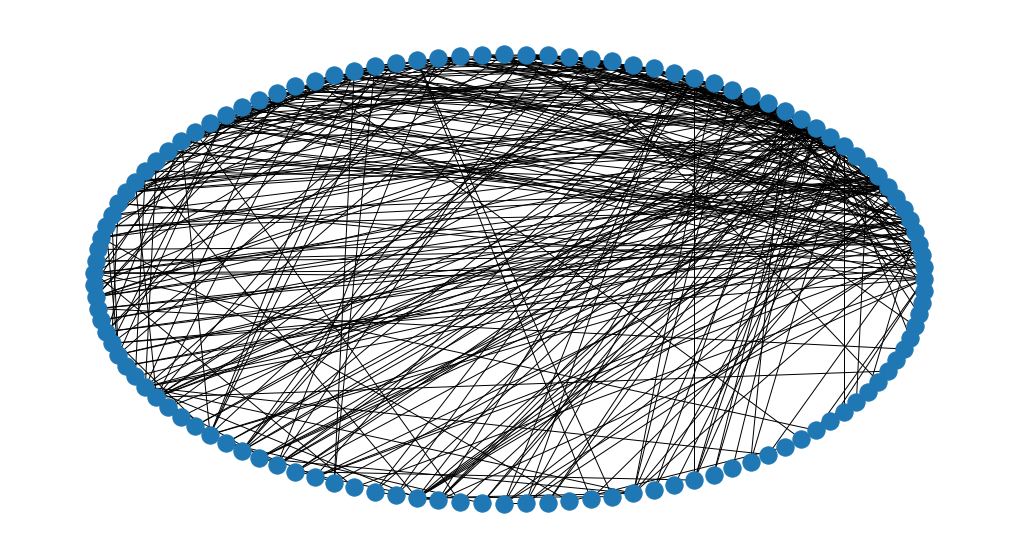

In [152]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

fig, ax = plt.subplots(figsize=(18,18))
nx.draw_circular(got,ax=ax)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

In [110]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())

Edges in largest connected component before removing self loops: 16064
Edges in largest connected component after removing self loops: 16064


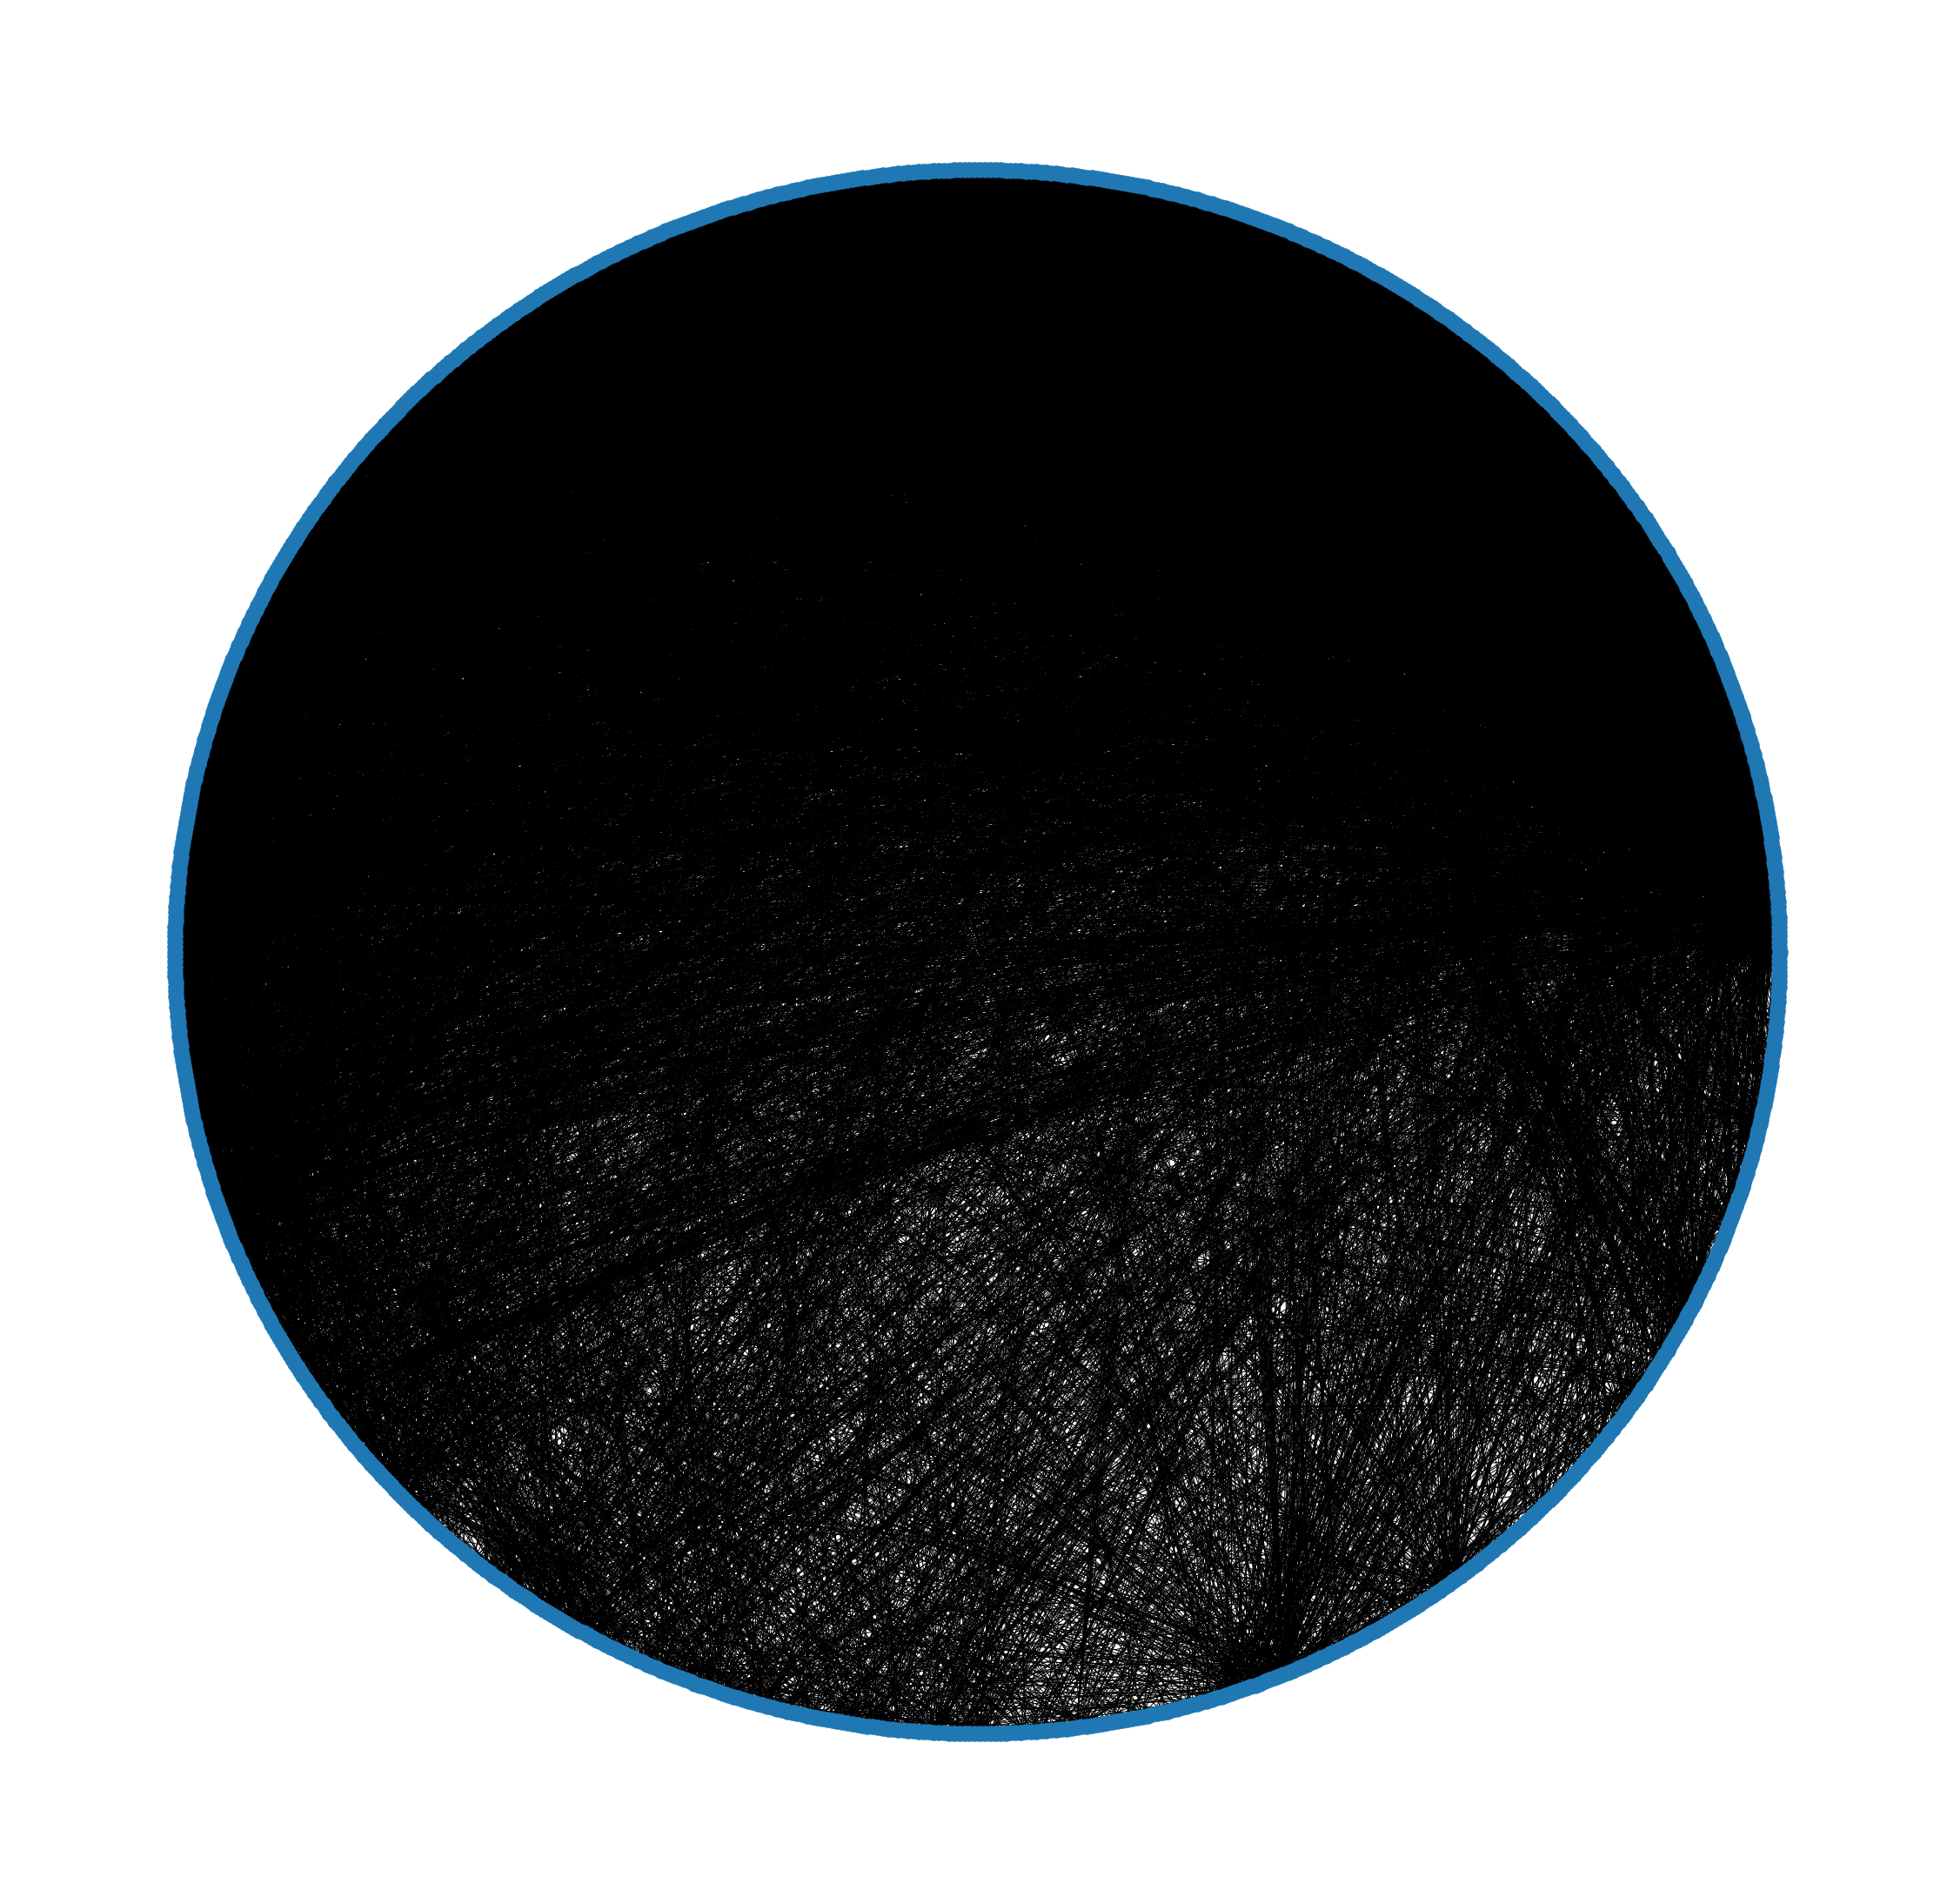

In [159]:
# find largest connected component
largest_con_comp = max(nx.connected_components(eu), key=len)

# find induced subgraph
largest_con_subgraph_eu = eu.subgraph(largest_con_comp)
print(f"Edges in largest connected component before removing self loops: {len(largest_con_subgraph_eu.edges)}")

# find self loops
self_loops = []
for node in largest_con_subgraph_eu.nodes:
    if (node, node) in largest_con_subgraph_eu.edges:
        self_loops.append((node,node))
        
eu.remove_edges_from(self_loops)
print(f"Edges in largest connected component after removing self loops: {len(largest_con_subgraph_eu.edges)}")

fig, ax = plt.subplots(figsize=(40,40))
nx.draw_circular(largest_con_subgraph_eu,ax=ax)

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [112]:
# function that plots degree distribution and return mean degree

def find_degree(G):
    degs = G.degree
    degrees = [b for (a,b) in degs]
    plt.hist(degrees, color='magenta')
    plt.title("Distribution of Degrees", fontsize=15)
    plt.xlabel("Degree", fontsize=13)
    plt.ylabel("#nodes", fontsize=13)
    plt.show()
    
    return statistics.mean(degrees), statistics.variance(degrees)

_Πραγματικές Τοπολογίες:_

**Football**

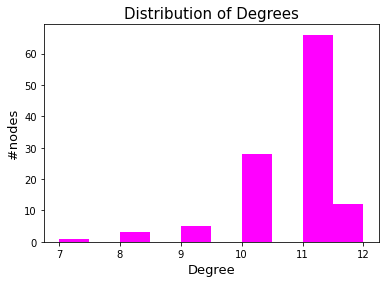

Mean Degree: 10.660869565217391


In [113]:
# football 
display(Markdown("**Football**"))
mmean, _ = find_degree(football)
print(f"Mean Degree: {mmean}")

**GoT**

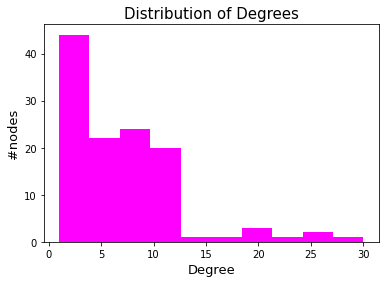

Mean Degree: 6.65546218487395


In [114]:
# Game of Throwns
display(Markdown("**GoT**"))
mmean, _ = find_degree(got)
print(f"Mean Degree: {mmean}")

**EU**

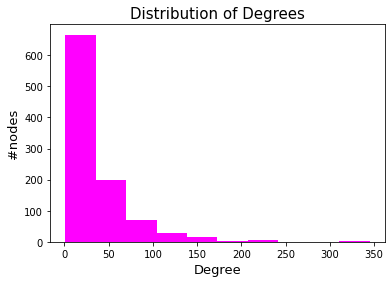

Mean Degree: 32.5841784989858


In [115]:
# EU
display(Markdown("**EU**"))
mmean, _ = find_degree(largest_con_subgraph_eu)
print(f"Mean Degree: {mmean}")

_Συνθετικές Τοπολογίες:_

**REG**

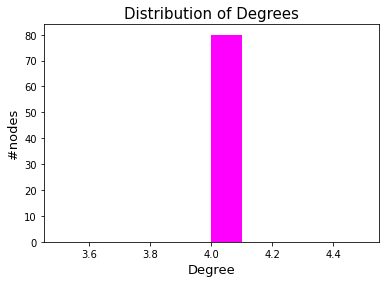

Mean Degree: 4


In [116]:
# REG
display(Markdown("**REG**"))
mmean, _ = find_degree(REG)
print(f"Mean Degree: {mmean}")

**RGER**

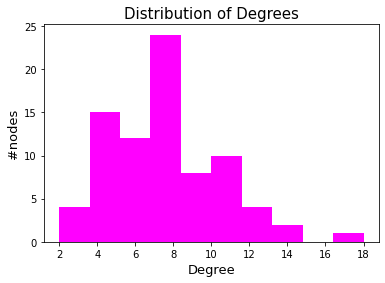

Mean Degree: 7.5


In [117]:
# RGER
# EU
display(Markdown("**RGER**"))
mmean, _ = find_degree(RGER)
print(f"Mean Degree: {mmean}")

**RGG**

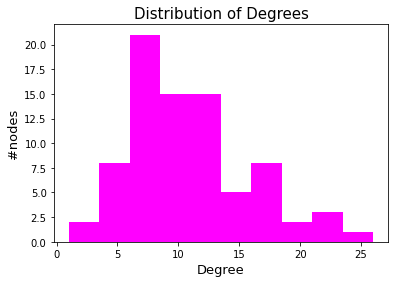

Mean Degree: 10.575


In [118]:
# RGG
display(Markdown("**RGG**"))
mmean, _ = find_degree(RGG)
print(f"Mean Degree: {mmean}")

**SF**

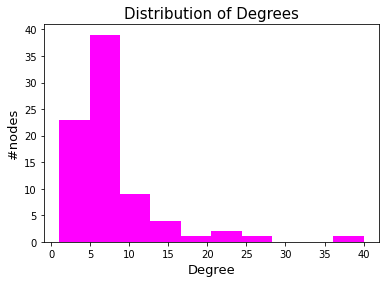

Mean Degree: 7.6


In [119]:
# SF
display(Markdown("**SF**"))
mmean, _ = find_degree(SF)
print(f"Mean Degree: {mmean}")

**SW**

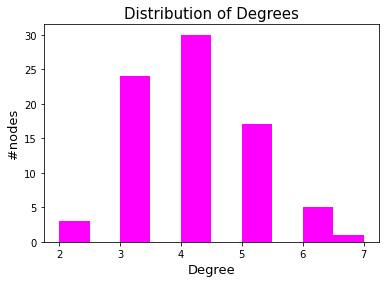

Mean Degree: 4


In [120]:
# SW
display(Markdown("**SW**"))
mmean, _ = find_degree(SW)
print(f"Mean Degree: {mmean}")

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

In [121]:
# function that plots cc and return cc statistics

def cc(graph):
    # get clustering coefficient
    GraphCC = dict(nx.clustering(graph))
    vals = list(GraphCC.values())
    
    # plot
    fig, ax = plt.subplots()
    ax.hist(vals, np.linspace(0,1, 10), color='magenta')
    ax.set_xticks([i/10 for i in range(11)])

    plt.title("Clustering Coefficient Distribution", fontsize=15)
    plt.xlabel("Clustering Coefficient", fontsize=13)
    plt.ylabel("#nodes", fontsize=13)
    plt.show()
    
    # mean and var
    mmean = statistics.mean(vals) 
    vvar = statistics.variance(vals)
    
    mmax, mmin = vals.index(max(vals)), vals.index(min(vals)) 
    return mmean, vvar, mmax, mmin

_Πραγματικές Τοπολογίες:_

**Football**

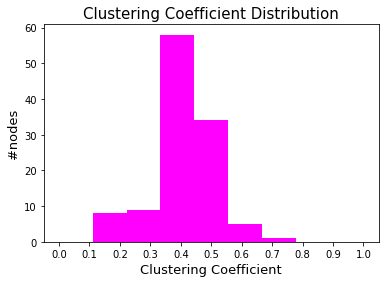

Mean CC: 0.403216011042098


In [122]:
# Football
display(Markdown("**Football**"))
mmean, _, _, _ = cc(football)
print(f"Mean CC: {mmean}")

**GoT**

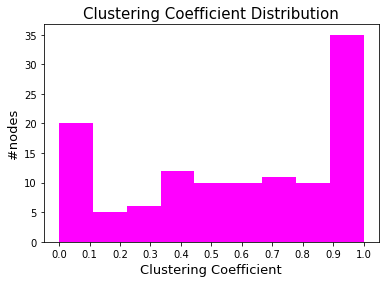

Mean CC: 0.5744036387164707


In [123]:
# GoT
display(Markdown("**GoT**"))
mmean, _, _, _ = cc(got)
print(f"Mean CC: {mmean}")

**EU**

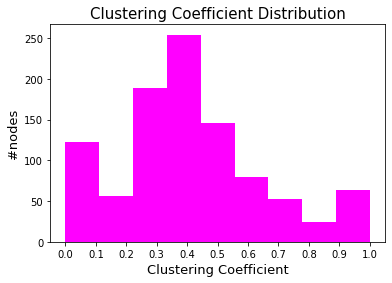

Mean CC: 0.4070504475195386


In [124]:
# EU
display(Markdown("**EU**"))
mmean, _, _, _ = cc(largest_con_subgraph_eu)
print(f"Mean CC: {mmean}")

_Συνθετικές Τοπολογίες:_

**REG**

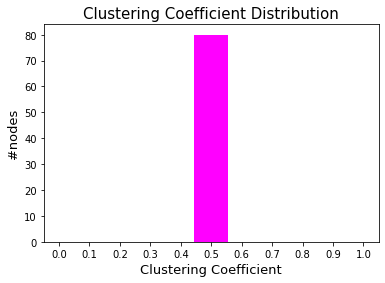

Mean CC: 0.5


In [125]:
# REG
display(Markdown("**REG**"))
mmean, _, _, _ = cc(REG)
print(f"Mean CC: {mmean}")

**RGER**

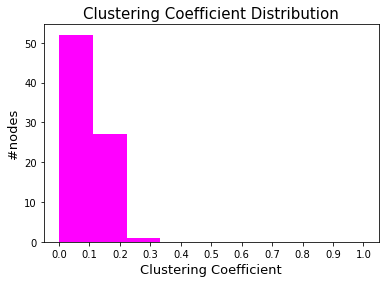

Mean CC: 0.08497775916893564


In [126]:
# RGER
display(Markdown("**RGER**"))
mmean, _, _, _ = cc(RGER)
print(f"Mean CC: {mmean}")

**RGG**

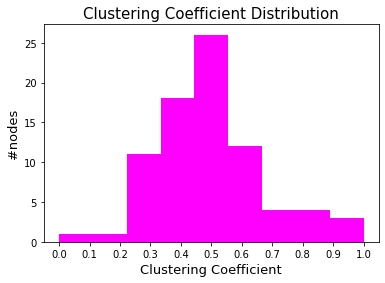

Mean CC: 0.49414340756852365


In [127]:
# RGG
display(Markdown("**RGG**"))
mmean, _, _, _ = cc(RGG)
print(f"Mean CC: {mmean}")

**SF**

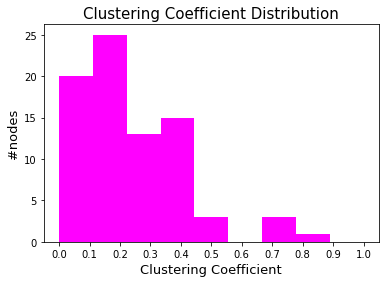

Mean CC: 0.22922761606585135


In [129]:
# SF
display(Markdown("**SF**"))
mmean, _, _, _ = cc(SF)
print(f"Mean CC: {mmean}")

**SW**

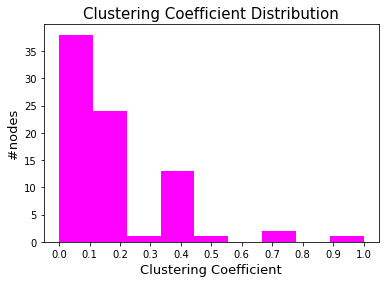

Mean CC: 0.1568452380952381


In [130]:
# SW
display(Markdown("**SW**"))
mmean, _, _, _ = cc(SW)
print(f"Mean CC: {mmean}")

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

In [131]:
# function that plots closeness centrality and returns its mean value

def find_closeness(G):
    close_cen = nx.closeness_centrality(G)
    close_cen_values = [round(item, 10) for item in close_cen.values()]
    plt.hist(close_cen_values, color='magenta')
    plt.title("Distribution of Closeness Centrality", fontsize=15)
    plt.xlabel("Closeness Centrality",fontsize=13)
    plt.ylabel("#nodes",fontsize=13)
    plt.show()
    return statistics.mean(close_cen_values), \
            statistics.variance(close_cen_values)

_Πραγματικές τοπολογίες_:

**Football**

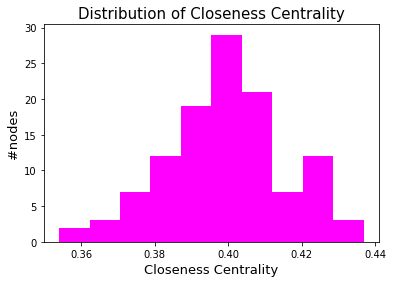

Mean Closeness Centrality: 0.399319078246087


In [135]:
# football
display(Markdown("**Football**"))
mmean, _ = find_closeness(football)
print(f"Mean Closeness Centrality: {mmean}")

**GoT**

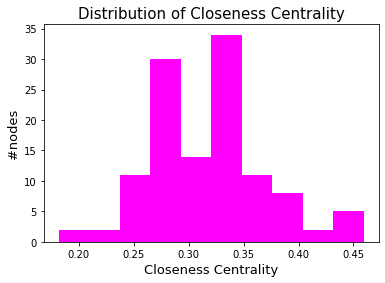

Mean Closeness Centrality: 0.31905170483361345


In [136]:
# GoT
display(Markdown("**GoT**"))
mmean, _ = find_closeness(got)
print(f"Mean Closeness Centrality: {mmean}")

**EU**

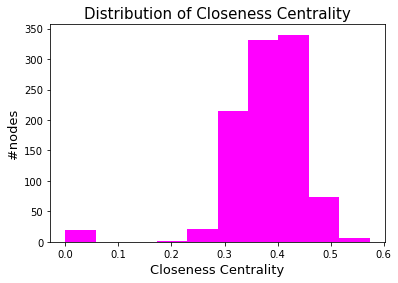

Mean Closeness Centrality: 0.37968268365432833


In [138]:
# EU
display(Markdown("**EU**"))
mmean, _ = find_closeness(eu)
print(f"Mean Closeness Centrality: {mmean}")

_Συνθετικές Τοπολογίες:_

**REG**

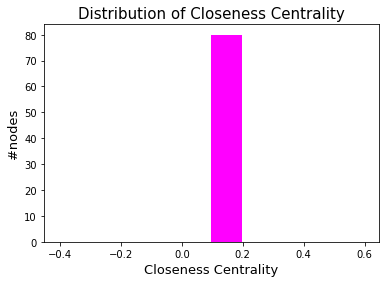

Mean Closeness Centrality: 0.0963414634


In [139]:
# REG
display(Markdown("**REG**"))
mmean, _ = find_closeness(REG)
print(f"Mean Closeness Centrality: {mmean}")

**RGER**

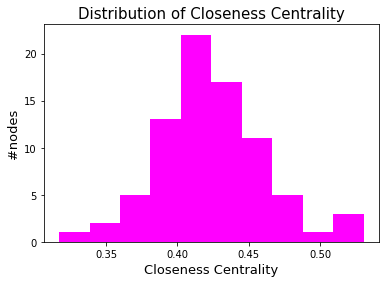

Mean Closeness Centrality: 0.4242297800925


In [140]:
# RGER
display(Markdown("**RGER**"))
mmean, _ = find_closeness(RGER)
print(f"Mean Closeness Centrality: {mmean}")

**RGG**

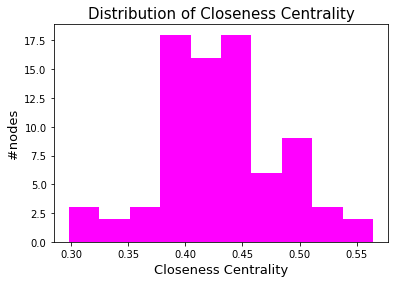

Mean Closeness Centrality: 0.42981828743


In [141]:
# RGG
display(Markdown("**RGG**"))
mmean, _ = find_closeness(RGG)
print(f"Mean Closeness Centrality: {mmean}")

**SF**

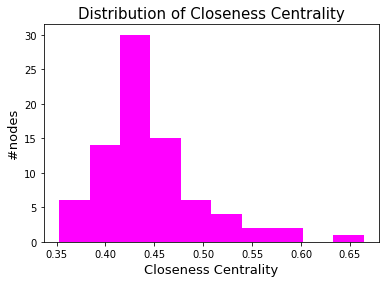

Mean Closeness Centrality: 0.446445383785


In [142]:
# SF
display(Markdown("**SF**"))
mmean, _ = find_closeness(SF)
print(f"Mean Closeness Centrality: {mmean}")

**SW**

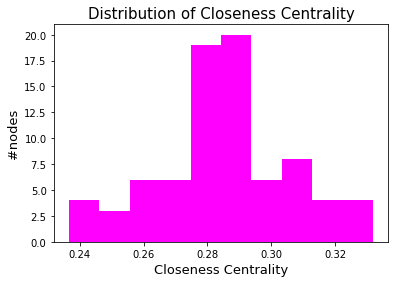

Mean Closeness Centrality: 0.28575810067375


In [143]:
# SW
display(Markdown("**SW**"))
mmean, _ = find_closeness(SW)
print(f"Mean Closeness Centrality: {mmean}")

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [ ]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [ ]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,50 Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

#### Οπτικοποίηση κοινοτήτων American College Football

#### Οπτικοποίηση κοινοτήτων Game of Thrones

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

#### Οπτικοποίηση κοινοτήτων REG

#### Οπτικοποίηση κοινοτήτων RGER

#### Οπτικοποίηση κοινοτήτων RGG

#### Οπτικοποίηση κοινοτήτων SW

#### Οπτικοποίηση κοινοτήτων SF